# Install dependencies



In [1]:
!pip install ucimlrepo
!pip install graphviz
!pip install plotly
!pip install scikit-plot
!pip install joblib
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import plotly.graph_objs as go
from sklearn.manifold import TSNE
import joblib
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes


#Getting data

In [2]:

predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

X = predict_students_dropout_and_academic_success.data.features
Y = predict_students_dropout_and_academic_success.data.targets

print(predict_students_dropout_and_academic_success.metadata)
print(predict_students_dropout_and_academic_success.variables)

joblib.dump(X, 'X.joblib')
joblib.dump(Y, 'Y.joblib')

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

['Y.joblib']

In [3]:

df = X.join(Y)
df.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
Y.value_counts()

Target  
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

# Some statistics

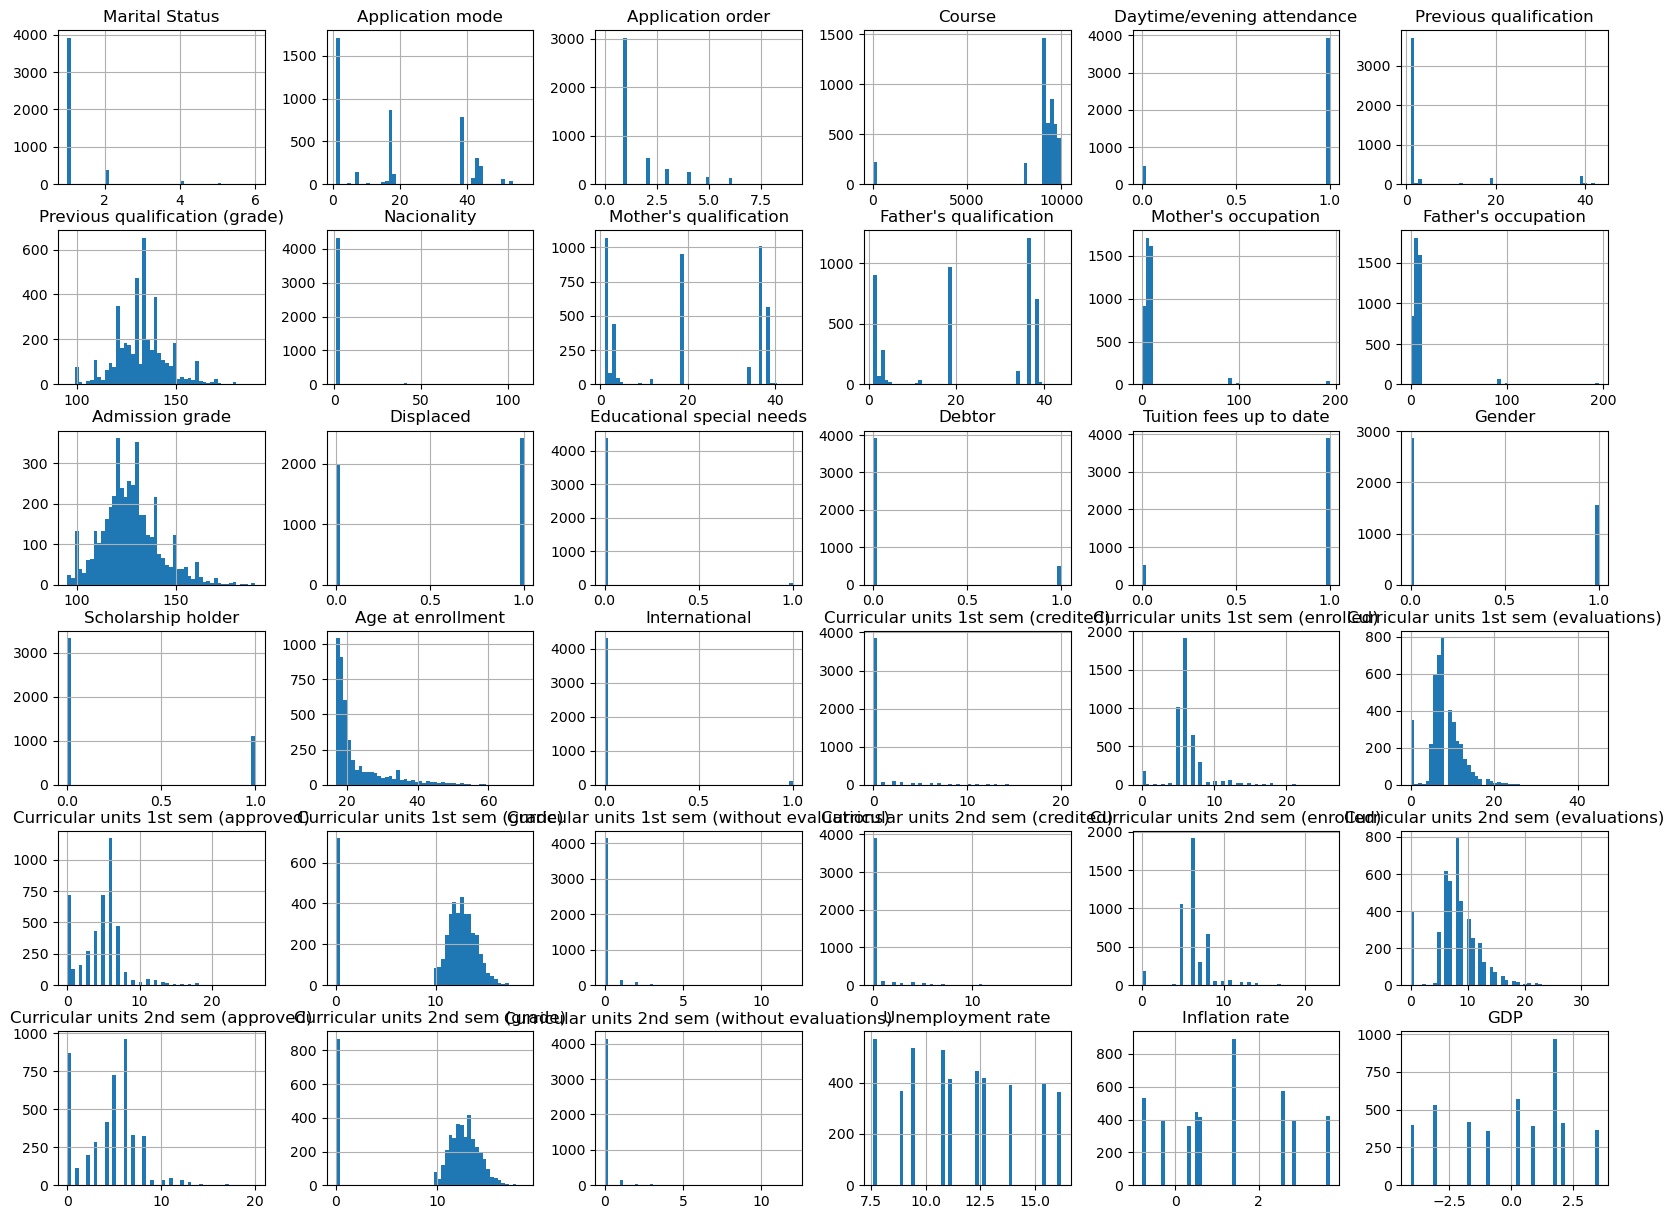

In [6]:
df[df.columns].hist(bins=50, figsize=(20,15))
plt.savefig("Histogram.png")

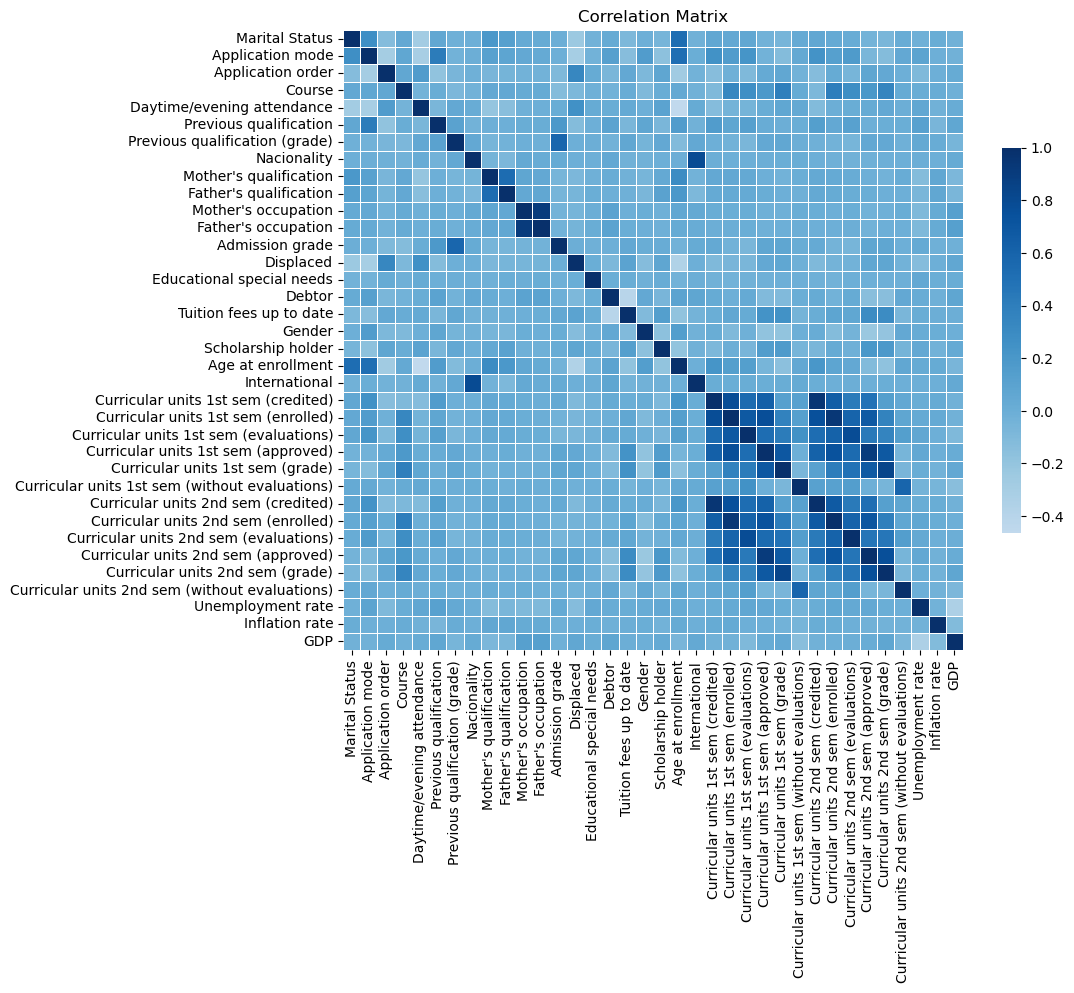

In [7]:
plot = plt.figure(figsize=(10,10))

sns.heatmap(X.corr(), annot=False, cmap='Blues', square = True, center=0, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.savefig("Correlation.png") # save as png


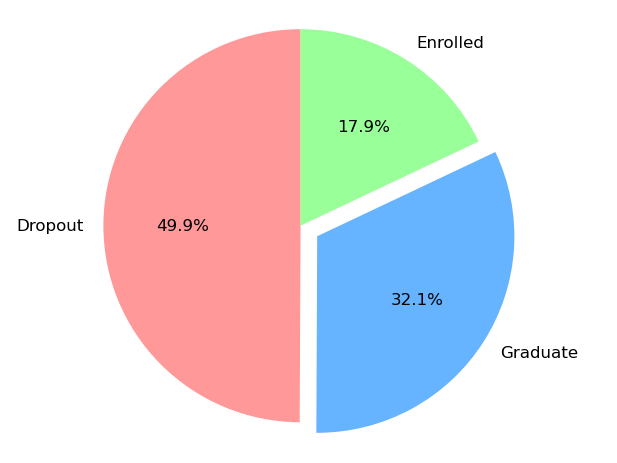

In [8]:
plt.rcParams.update({'font.size': 12})
labels = ['Dropout', 'Graduate', 'Enrolled']
sizes = Y.value_counts().values
explode = (0, 0.1, 0)  # only "explode" the 1st slice
colors = ['#ff9999', '#66b3ff', '#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
plt.tight_layout()
plt.savefig("PieChart.png")
plt.show()

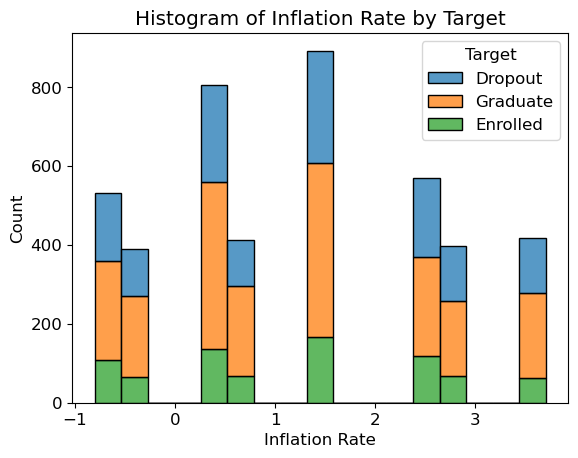

In [9]:
sns.histplot(x='Inflation rate', data=df, hue='Target', multiple='stack')
plt.xlabel('Inflation Rate')
plt.ylabel('Count')
plt.title('Histogram of Inflation Rate by Target')
plt.savefig("InflationRate.png")



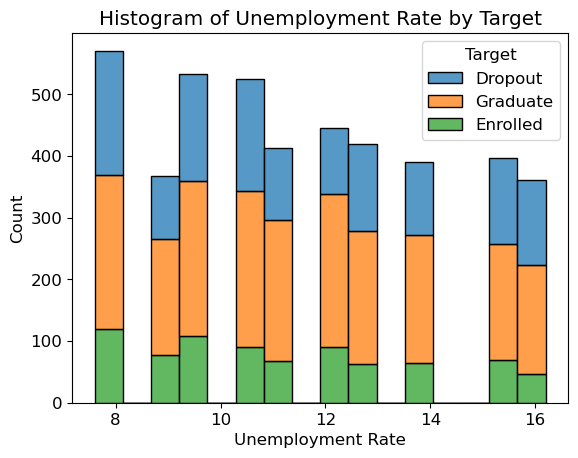

In [10]:
sns.histplot(x='Unemployment rate', data=df, hue='Target', multiple='stack')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Histogram of Unemployment Rate by Target')
plt.savefig("UnemploymentRate.png")

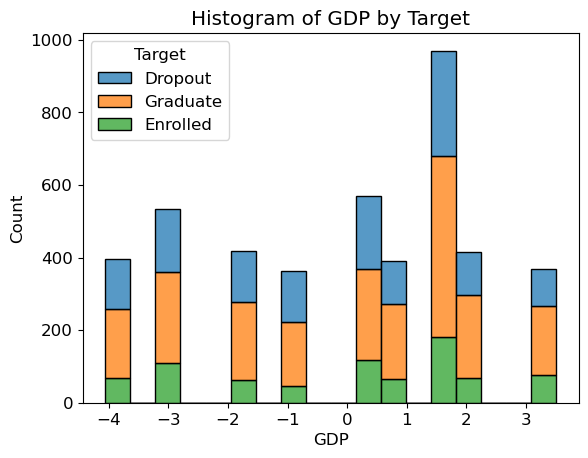

In [11]:
sns.histplot(x='GDP', data=df, hue='Target', multiple='stack')
plt.xlabel('GDP')
plt.ylabel('Count')
plt.title('Histogram of GDP by Target')
plt.savefig("GDP.png")

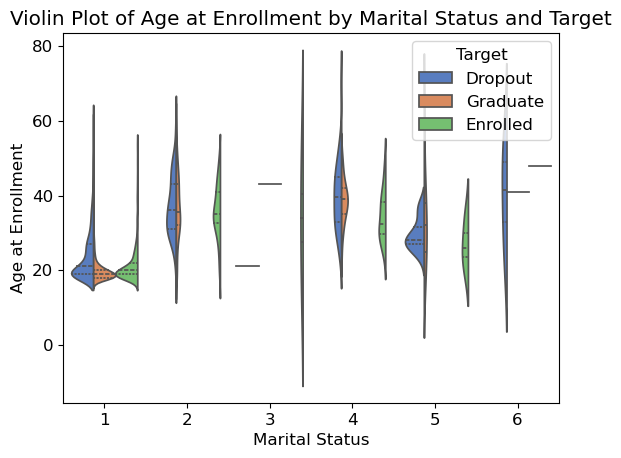

In [12]:
sns.violinplot(
    data=df,
    x='Marital Status',
    y='Age at enrollment',
    hue='Target',
    split=True,
    inner='quart',
    palette='muted'
)

plt.xlabel('Marital Status')
plt.ylabel('Age at Enrollment')
plt.title('Violin Plot of Age at Enrollment by Marital Status and Target')
plt.legend(title='Target')
plt.savefig("AgeEnrollmentViolin.png")
plt.show()


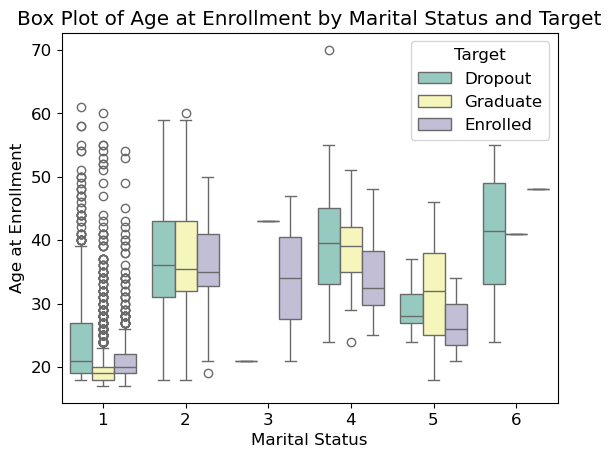

In [13]:
sns.boxplot(
    data=df,
    x='Marital Status',
    y='Age at enrollment',
    hue='Target',
    palette='Set3'
)

plt.xlabel('Marital Status')
plt.ylabel('Age at Enrollment')
plt.title('Box Plot of Age at Enrollment by Marital Status and Target')
plt.legend(title='Target')
plt.savefig("AgeEnrollmentBoxPlot.png")
plt.show()


In [14]:


X_scaled = StandardScaler().fit_transform(X)

# Apply t-SNE to reduce dimensionality to 3D
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

# Replace Y_tsne to a 1D array
Y_tsne = Y.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).astype(int).values.ravel()

# save the tsne data so it doesnt takes to long to run
joblib.dump(X_tsne_3d, 'X_tsne_3d.joblib')
joblib.dump(Y_tsne, 'Y_tsne.joblib')
joblib.dump(X_scaled, 'X_scaled.joblib')

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\2395871949.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_tsne = Y.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).astype(int).values.ravel()


['X_scaled.joblib']

In [15]:
#load X and Y from joblib file
X_tsne_3d = joblib.load('X_tsne_3d.joblib')
Y_tsne = joblib.load('Y_tsne.joblib')
X_scaled = joblib.load('X_scaled.joblib')
# Create graphic with plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_tsne_3d[:, 0],
    y=X_tsne_3d[:, 1],
    z=X_tsne_3d[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=Y_tsne,  # Define colors as Y_tsne values
        colorscale='Rainbow',
        opacity=0.8,
        colorbar=dict(title="Target Variable")
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    title='3D t-SNE Visualization'
)

fig.show(renderer="colab")


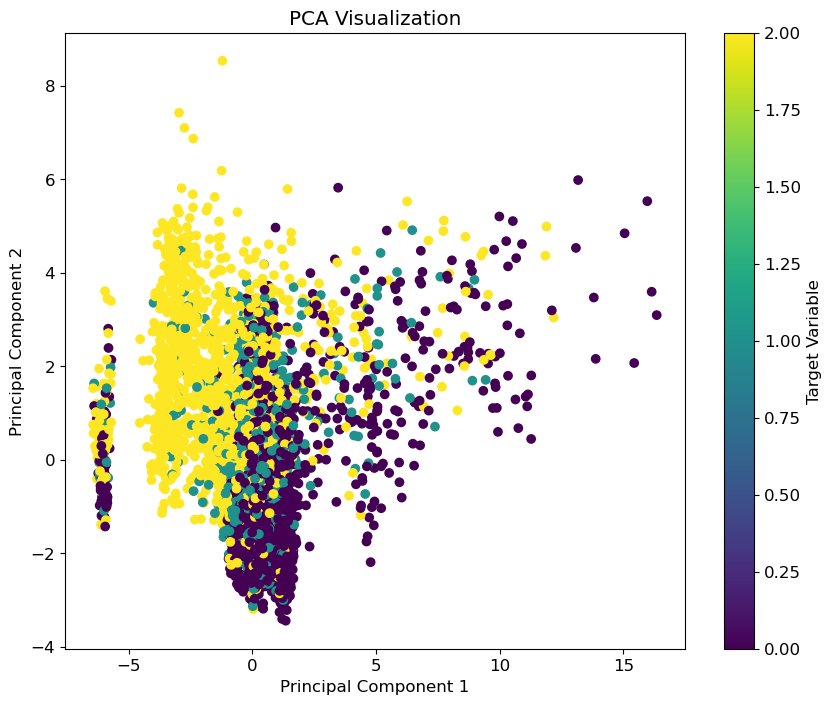

In [16]:
Y_tsne = joblib.load('Y_tsne.joblib')

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], c=Y_tsne)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Variable')
plt.show()

#Approach
Now it's time to put the ML models side by side and decide wich one has the best overall accuracy.

## Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True ,random_state=42)
y_train = y_train.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).values.ravel()
y_test = y_test.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).values.ravel()


C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\1266002635.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\1266002635.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [18]:

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Train length: {len(X_train)}")
print(f"Test length: {len(X_test)}")

X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train shape: (3539,)
y_test shape: (885,)
Train length: 3539
Test length: 885




# K Nearest Neighbours (KNN)


In [19]:

knn_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('knn', KNeighborsClassifier())
                               ])
knn_pipeline.fit(X_train, y_train)

list_of_neighbours = []
for i in range(1,50):
    list_of_neighbours.append(i)
print(list_of_neighbours)
search_params = {'knn__n_neighbors': list_of_neighbours}
#maximizar por outra metrica
grid = GridSearchCV(knn_pipeline, param_grid=search_params, cv=5, n_jobs=-1, verbose=4)
grid.fit(X_train, y_train)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             verbose=4)

## Results

Best params: {'knn__n_neighbors': 13}
Best score: 0.7064156657796531


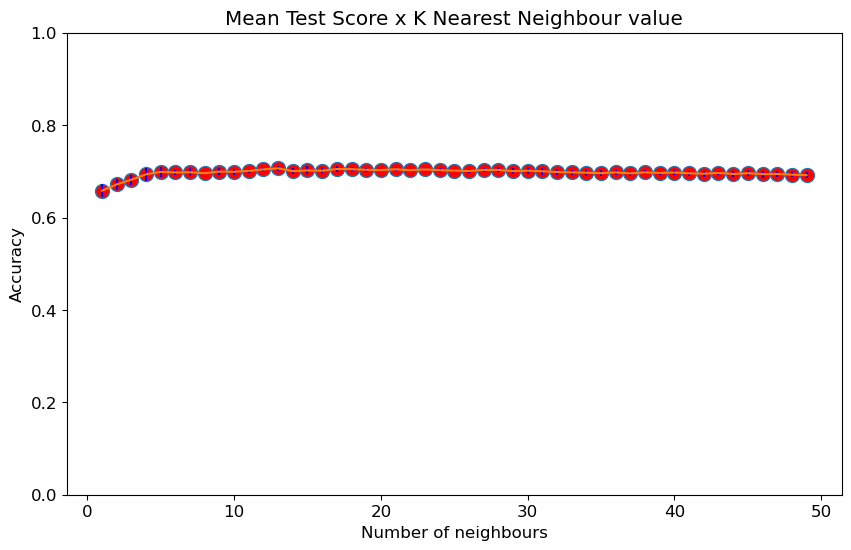

In [20]:

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

#Plotting data
plt.figure(figsize=(10,6))
plt.plot(list_of_neighbours, grid.cv_results_['mean_test_score'], linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.errorbar(list_of_neighbours, grid.cv_results_['mean_test_score'], yerr=grid.cv_results_['std_test_score'],ecolor='Blue', )

plt.ylim(0,1)
plt.title('Mean Test Score x K Nearest Neighbour value')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()


Best model stats


Test Accuracy:  0.6971751412429379
Train accuracy:  0.739756993500989
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       418
           1       0.35      0.15      0.21       151
           2       0.86      0.62      0.72       316

    accuracy                           0.70       885
   macro avg       0.63      0.57      0.57       885
weighted avg       0.69      0.70      0.66       885



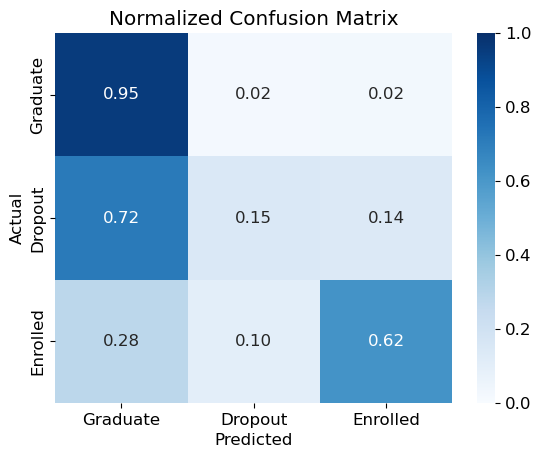

In [21]:
print("Test Accuracy: ", grid.best_estimator_.score(X_test, y_test))
print("Train accuracy: ", grid.best_estimator_.score(X_train, y_train))
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))
cmat = confusion_matrix(
      y_test,
      grid.best_estimator_.predict(X_test),
      normalize='true',
      labels=([0,1,2]))
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()

# Decision Tree


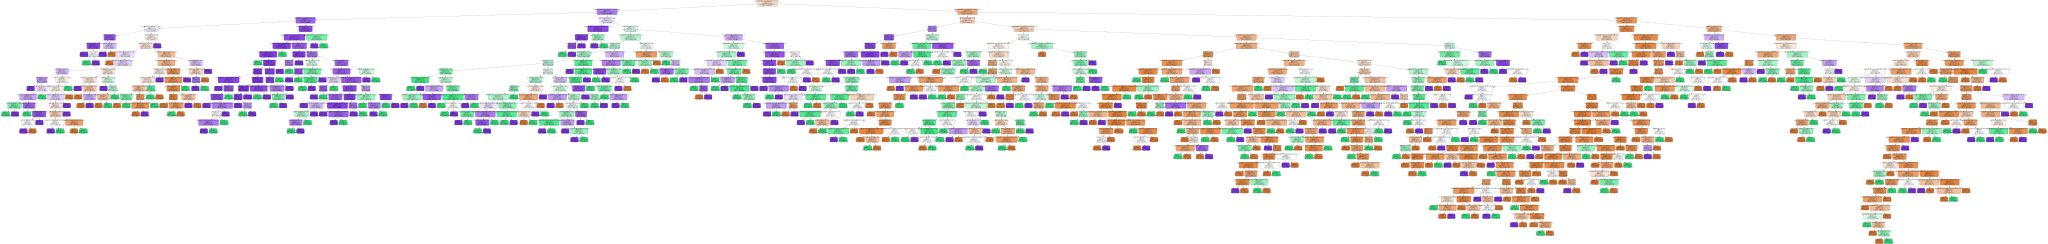

In [22]:


dec_tree_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('dec_tree', DecisionTreeClassifier(random_state=42))
                               ])

dec_tree_pipeline.fit(X_train, y_train)
y_tree_predicted = dec_tree_pipeline.predict(X_test)

# Extract the fitted decision tree model from the pipeline
dec_tree = dec_tree_pipeline.named_steps['dec_tree']

export_graphviz(
      dec_tree,  # Now you are referencing the extracted decision tree model
      out_file="tree.dot",
      feature_names=X.columns,
      class_names=Y.Target.unique(),
      rounded=True,
      filled=True
)

Source.from_file("tree.dot")


## Results

Accuracy:  0.6757062146892655
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       418
           1       0.36      0.40      0.38       151
           2       0.72      0.64      0.68       316

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.68      0.68       885

[[336  41  41]
 [ 54  61  36]
 [ 46  69 201]]


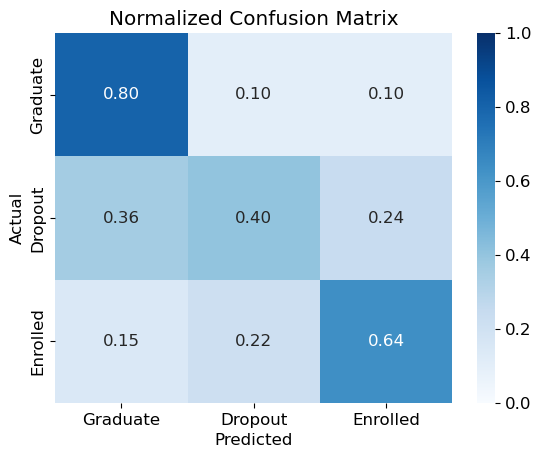

In [23]:

print("Accuracy: ", dec_tree_pipeline.score(X_test, y_test))
print(classification_report(y_test, y_tree_predicted))
print(confusion_matrix(y_test, y_tree_predicted))

cmat = confusion_matrix(
      y_test,
      y_tree_predicted,
      normalize='true',
      labels=([0,1,2]))

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()

# Logistic Regression

In [24]:

log_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('log', LogisticRegression())
                               ])

log_pipeline.fit(X_train, y_train)
y_log_predicted = log_pipeline.predict(X_test)

## Results

Accuracy:  0.752542372881356
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       418
           1       0.45      0.28      0.34       151
           2       0.83      0.77      0.80       316

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885

[[380  24  14]
 [ 74  42  35]
 [ 45  27 244]]


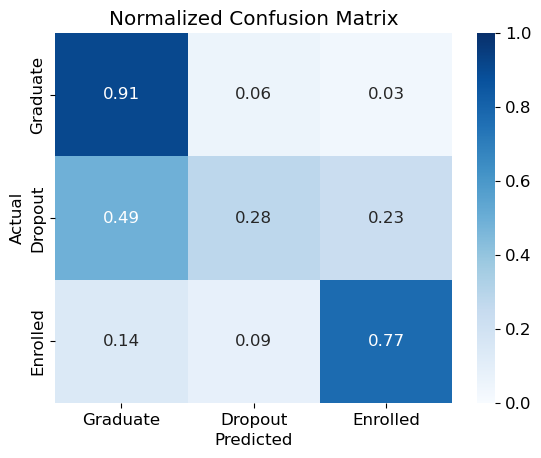

In [25]:
print("Accuracy: ", log_pipeline.score(X_test, y_test))
print(classification_report(y_test, y_log_predicted))
print(confusion_matrix(y_test, y_log_predicted))


cmat = confusion_matrix(
      y_test,
      y_log_predicted,
      normalize='true',
      labels=([0,1,2]))

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()

# Support Vector Machines

In [26]:

clf = make_pipeline(StandardScaler(), SVC(cache_size=2000))
clf.fit(X_train, y_train)
y_svm_predicted = clf.predict(X_test)

## Results

Accuracy:  0.7548022598870057
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       418
           1       0.48      0.32      0.38       151
           2       0.89      0.72      0.79       316

    accuracy                           0.75       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.75      0.74       885

[[393  18   7]
 [ 81  48  22]
 [ 55  34 227]]


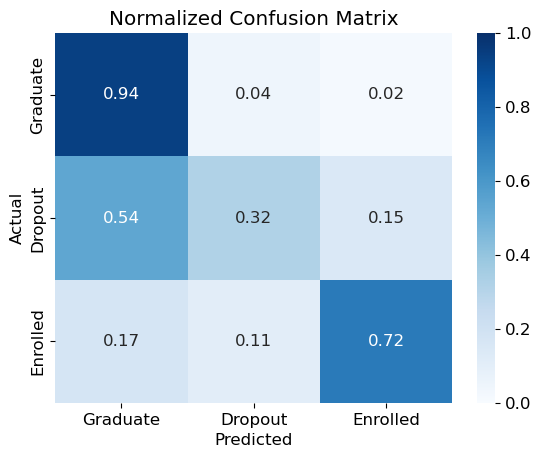

In [27]:
print("Accuracy: ", clf.score(X_test, y_test))
print(classification_report(y_test, y_svm_predicted))
print(confusion_matrix(y_test, y_svm_predicted))


cmat = confusion_matrix(
      y_test,
      y_svm_predicted,
      normalize='true',
      labels=([0,1,2]))

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()


# Gaussian Naive Bayes

In [28]:

gauss_nb_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('nb', GaussianNB())
                               ])

gauss_nb_pipeline.fit(X_train, y_train)
y_gauss_predicted = gauss_nb_pipeline.predict(X_test)

##Results

Accuracy:  0.6926553672316385
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       418
           1       0.36      0.25      0.29       151
           2       0.81      0.68      0.74       316

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.60       885
weighted avg       0.68      0.69      0.68       885

[[359  35  24]
 [ 85  38  28]
 [ 66  34 216]]


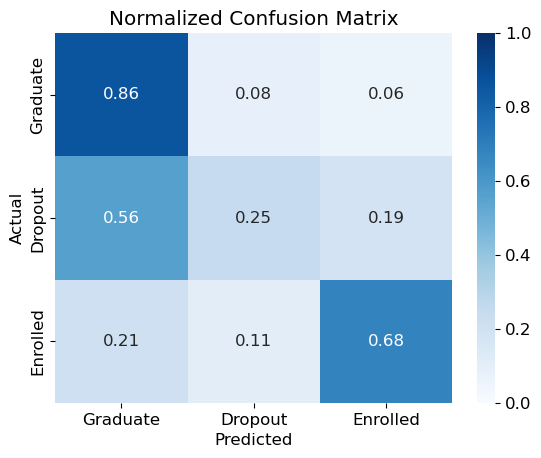

In [29]:
print("Accuracy: ", gauss_nb_pipeline.score(X_test, y_test))
print(classification_report(y_test, y_gauss_predicted))

print(confusion_matrix(y_test, y_gauss_predicted))


cmat = confusion_matrix(
      y_test,
      y_gauss_predicted,
      normalize='true',
      labels=([0,1,2]))

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()

#Naive Bayes

In [30]:

nb_pipeline = Pipeline(steps=[
                                ('scaler', MinMaxScaler()),
                                ('nb', naive_bayes.MultinomialNB())
                               ])

nb_pipeline.fit(X_train, y_train)
y_nb_predicted = nb_pipeline.predict(X_test)

## Results

Accuracy:  0.6632768361581921
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       418
           1       0.67      0.01      0.03       151
           2       0.77      0.61      0.68       316

    accuracy                           0.66       885
   macro avg       0.69      0.52      0.48       885
weighted avg       0.68      0.66      0.60       885

[[393   0  25]
 [118   2  31]
 [123   1 192]]


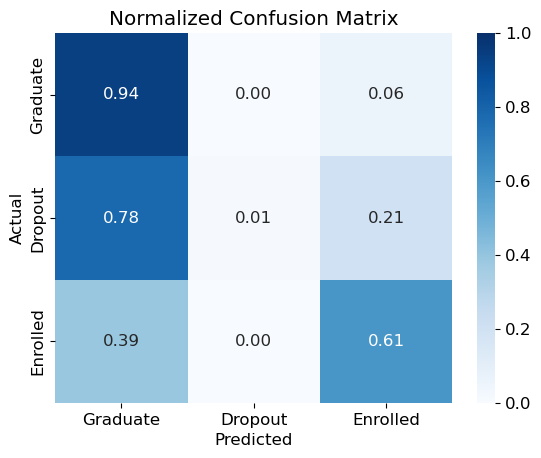

In [31]:
print("Accuracy: ", nb_pipeline.score(X_test, y_test))
print(classification_report(y_test, y_nb_predicted))
print(confusion_matrix(y_test, y_nb_predicted))


cmat = confusion_matrix(
      y_test,
      y_nb_predicted,
      normalize='true',
      labels=([0,1,2]))

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
plt.savefig("ConfusionMatrix_KNN.png")
plt.show()

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [100, 200, 300, 400, 500]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid_rf = {'rf__n_estimators': n_estimators, 'rf__max_depth': max_depth}




rf_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('rf', RandomForestClassifier(n_jobs=-1))
                               ])

grid = GridSearchCV(rf_pipeline, param_grid=grid_rf)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'rf_pipeline.joblib')



Best params: {'rf__max_depth': 80, 'rf__n_estimators': 500}
Best score: 0.7793209950535005


['rf_pipeline.joblib']

## Results

Accuracy:  0.7706214689265537
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       418
           1       0.51      0.31      0.39       151
           2       0.85      0.77      0.81       316

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.76      0.77      0.75       885

Confusion Matrix: 
 [[393  18   7]
 [ 69  47  35]
 [ 47  27 242]]


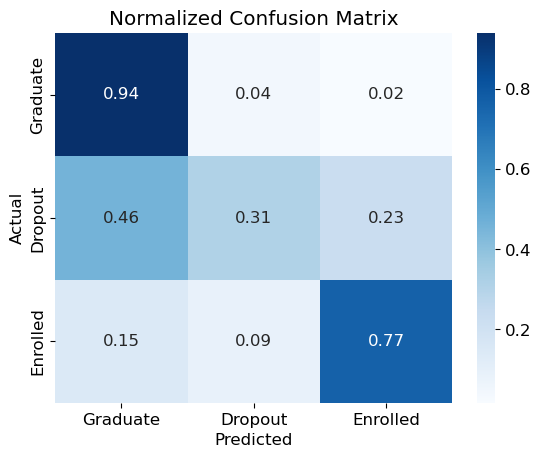

In [33]:
best_rf_pipeline = joblib.load('rf_pipeline.joblib')

print("Accuracy: ", best_rf_pipeline.score(X_test, y_test))
print(classification_report(y_test, best_rf_pipeline.predict(X_test)))
print("Confusion Matrix: \n",confusion_matrix(y_test, best_rf_pipeline.predict(X_test)))


cmat = confusion_matrix(
      y_test,
      best_rf_pipeline.predict(X_test),
      labels=([0, 1, 2]),
      normalize='true')

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    )

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
plt.savefig("ConfusionMatrix_Random_Forest.png")
plt.show()

# XGB classifier

In [34]:
!pip install xgboost
from xgboost import XGBClassifier

In [35]:

grid_params = {
    'xgb__learning_rate': [0.1,0.2,0.3],
    'xgb__n_estimators': [25,50,100],
    'xgb__booster': ['gbtree', 'gblinear', 'dart', None],
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__max_depth': [5, 6, 7]
}

xgb_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('xgb', XGBClassifier())
                               ])

grid = GridSearchCV(xgb_pipeline, param_grid=grid_params)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'xgb_pipeline.joblib')

Best params: {'xgb__booster': 'gbtree', 'xgb__learning_rate': 1, 'xgb__n_estimators': 2, 'xgb__objective': 'binary:logistic'}
Best score: 0.7722568503823748


['xgb_pipeline.joblib']

## Results

Accuracy:  0.735593220338983
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       418
           1       0.44      0.28      0.35       151
           2       0.81      0.71      0.76       316

    accuracy                           0.74       885
   macro avg       0.67      0.64      0.64       885
weighted avg       0.72      0.74      0.72       885

Confusion Matrix: 
 [[384  18  16]
 [ 72  43  36]
 [ 56  36 224]]


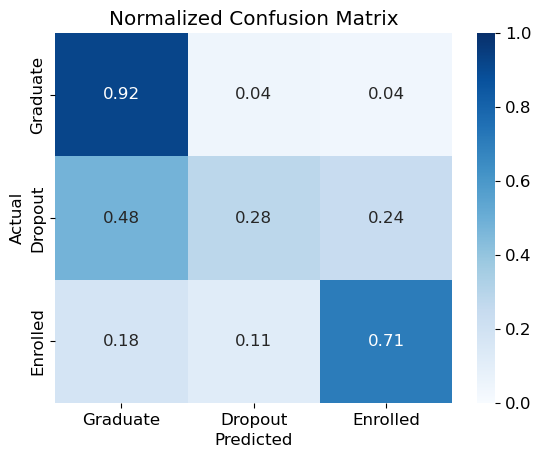

In [36]:
clf_pipe = joblib.load('xgb_pipeline.joblib')
print("Accuracy: ", clf_pipe.score(X_test, y_test))
print(classification_report(y_test, clf_pipe.predict(X_test)))
print("Confusion Matrix: \n",confusion_matrix(y_test, clf_pipe.predict(X_test)))

cmat = confusion_matrix(
      y_test,
      clf_pipe.predict(X_test),
      normalize='true',
      labels=([0,1,2]))
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
plt.savefig("ConfusionMatrix_XGB.png")
plt.show()

# Problem!!!
As seen in the previous results, the models tend to mispredict the `"Enrolled"` class. This likely occurs because the target classes are unbalanced, causing the models to be inclined to classify only the `"Dropouts"` and `"Graduates"`. However, one potential solution is to apply class weights in the best models to see if the results become less biased. Another approach is to drop the `"Enrolled"` class, as the study's scope focuses on predicting academic success, and, in this context, the `"Dropouts"` and `"Graduates"` classes should adequately represent the theme.

# Use weighted models

##Random Forest (class frequency)

In [37]:
from sklearn.metrics import f1_score, make_scorer


f1 = make_scorer(f1_score, average='macro')

n_estimators = [100, 200, 300, 400, 500]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid_rf = {'rf__n_estimators': n_estimators, 'rf__max_depth': max_depth}




rf_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced_subsample"))
                               ])

grid = GridSearchCV(rf_pipeline, param_grid=grid_rf, scoring=f1)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'rf_pipeline.joblib')


Best params: {'rf__max_depth': 10, 'rf__n_estimators': 500}
Best score: 0.7153740167869288


['rf_pipeline.joblib']

### Results

Accuracy:  0.7491525423728813
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       418
           1       0.44      0.49      0.46       151
           2       0.86      0.71      0.78       316

    accuracy                           0.75       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.75      0.75       885

Confusion Matrix: 
 [[366  42  10]
 [ 52  74  25]
 [ 39  54 223]]


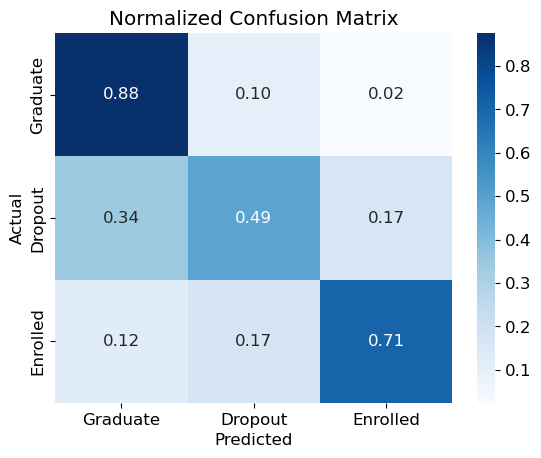

In [38]:
best_rf_pipeline = joblib.load('rf_pipeline.joblib')

print("Accuracy: ", best_rf_pipeline.score(X_test, y_test))
print(classification_report(y_test, best_rf_pipeline.predict(X_test)))
print("Confusion Matrix: \n",confusion_matrix(y_test, best_rf_pipeline.predict(X_test)))


cmat = confusion_matrix(
      y_test,
      best_rf_pipeline.predict(X_test),
      labels=([0, 1, 2]),
      normalize='true')

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    )

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
plt.savefig("ConfusionMatrix_Random_Forest_Weighted.png")
plt.show()

## Logistic Regression (class frequency)

In [39]:
from sklearn.linear_model import SGDClassifier


f1 = make_scorer(f1_score, average='macro')

params = {
    "sgdclassifier__penalty": ["l1", "l2"],
    "sgdclassifier__max_iter": [1000, 2000, 3000]
}

lr_w_classifier_search = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('sgdclassifier', SGDClassifier(random_state=42,
                                                                class_weight="balanced",
                                                                early_stopping=True,
                                                                loss="log_loss"
                                                                ))
                               ])

grid = GridSearchCV(lr_w_classifier_search, param_grid=params, scoring=f1)
grid.fit(X_train, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'lr_w_classifier_search.joblib')


Best params: {'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l1'}
Best score: 0.634069322370783


['lr_w_classifier_search.joblib']

### Results

Accuracy:  0.6384180790960452
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       418
           1       0.29      0.47      0.36       151
           2       0.77      0.70      0.73       316

    accuracy                           0.64       885
   macro avg       0.61      0.61      0.60       885
weighted avg       0.69      0.64      0.66       885

Confusion Matrix: 
 [[272 116  30]
 [ 43  71  37]
 [ 36  58 222]]


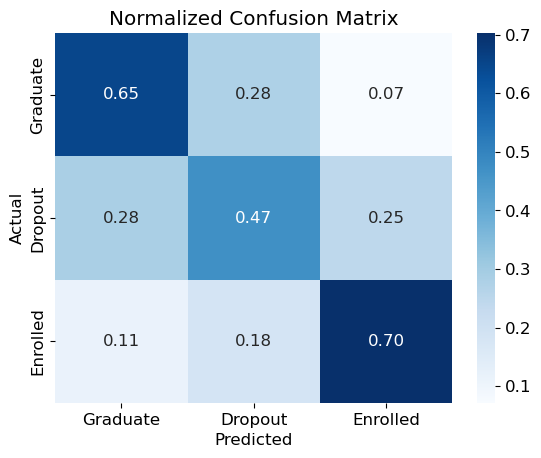

In [40]:
best_lr_w_classifier_search = joblib.load('lr_w_classifier_search.joblib')

print("Accuracy: ", best_lr_w_classifier_search.score(X_test, y_test))
print(classification_report(y_test, best_lr_w_classifier_search.predict(X_test)))
print("Confusion Matrix: \n",confusion_matrix(y_test, best_lr_w_classifier_search.predict(X_test)))


cmat = confusion_matrix(
      y_test,
      best_lr_w_classifier_search.predict(X_test),
      labels=([0, 1, 2]),
      normalize='true')

ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    )

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
plt.savefig("ConfusionMatrix_LR_Weighted.png")
plt.show()

# Drop Enrolled
Now we are dropping the "Enrolled" class, so the problem is now binary and it should be a lot easier for the model to classify right.

In [47]:
df_not_enrolled = df[df['Target'] != 'Enrolled']
Y_not_enrolled = df_not_enrolled['Target']
x_not_enrolled = df_not_enrolled.drop(['Target'], axis=1)

In [48]:
print(x_not_enrolled.shape)
print(Y_not_enrolled.shape)

print(X.shape)
print(Y.shape)

(3630, 36)
(3630,)
(4424, 36)
(4424, 1)


In [49]:
Y_not_enrolled.value_counts().values

array([2209, 1421], dtype=int64)

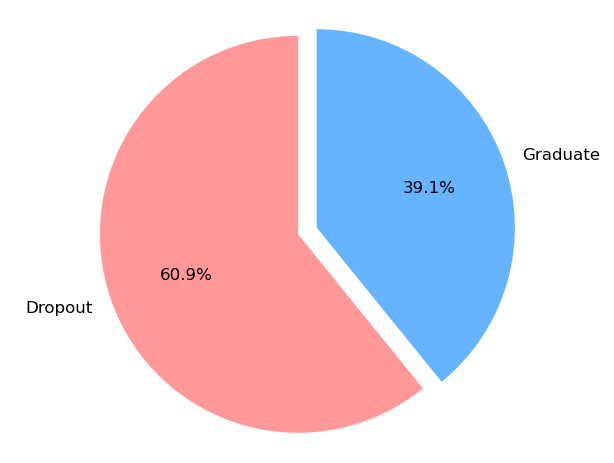

In [50]:
plt.rcParams.update({'font.size': 12})
labels2 = ['Dropout', 'Graduate']
sizes = Y_not_enrolled.value_counts().values
explode = (0, 0.1)  # only "explode" the 1st slice
colors = ['#ff9999', '#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
plt.tight_layout()
plt.savefig("PieChartNotEnrolled.png")
plt.show()

**Note that the dataset is still unbalanced. So the approach will be to re-train the best models, first using the best parameters found by GridSearch, then using the other alternative(with or without weights). Finally, we print side by side the correlation matrixes**

## Train-Test Split 2

In [78]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_not_enrolled, Y_not_enrolled, test_size=0.2, shuffle=True ,random_state=42)
y_train_2 = y_train_2.replace({'Graduate': 0, 'Dropout': 1}).values.ravel()
y_test_2 = y_test_2.replace({'Graduate': 0, 'Dropout': 1}).values.ravel()

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\3951955763.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\3951955763.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## Random Forest 2
Now, a new parameter in the grid was added in order to see if the Weights made the model any better.

In [52]:


f1 = make_scorer(f1_score, average='macro')

n_estimators = [100, 200, 300, 400, 500]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid_rf2 = {'rf__n_estimators': n_estimators, 'rf__max_depth': max_depth, 'rf__class_weight': ['balanced_subsample', None]}




rf2_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
                               ])

grid = GridSearchCV(rf2_pipeline, param_grid=grid_rf2, scoring=f1)
grid.fit(X_train_2, y_train_2)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'rf2_pipeline.joblib')

Best params: {'rf__class_weight': None, 'rf__max_depth': 30, 'rf__n_estimators': 500}
Best score: 0.9030691684121347


['rf2_pipeline.joblib']

In [57]:
best_rf_pipeline2 = joblib.load('rf2_pipeline.joblib')
print("Accuracy: ", best_rf_pipeline2.score(X_test_2, y_test_2))
print(classification_report(y_test_2, best_rf_pipeline2.predict(X_test_2)))
print("Confusion Matrix: \n", confusion_matrix(y_test_2, best_rf_pipeline2.predict(X_test_2)))

Accuracy:  0.9008264462809917
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       449
           1       0.92      0.81      0.86       277

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Confusion Matrix: 
 [[429  20]
 [ 52 225]]


Just for comparison, we'll train a model with `'rf__class_weight': 'balanced_subsample', 'rf__max_depth': 30, 'rf__n_estimators': 500`

In [58]:
f1 = make_scorer(f1_score, average='macro')


rf2_pipeline_weight = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42, class_weight= 'balanced_subsample', max_depth=30, n_estimators=500))
                               ])
rf2_pipeline_weight.fit(X_train_2, y_train_2)

joblib.dump(rf2_pipeline_weight, 'rf2_pipeline_weight.joblib')

['rf2_pipeline_weight.joblib']

In [59]:
print("Accuracy: ", rf2_pipeline_weight.score(X_test_2, y_test_2))
print(classification_report(y_test_2, rf2_pipeline_weight.predict(X_test_2)))
print("Confusion Matrix: \n",confusion_matrix(y_test_2, rf2_pipeline_weight.predict(X_test_2)))

Accuracy:  0.8994490358126722
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       449
           1       0.91      0.82      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Confusion Matrix: 
 [[426  23]
 [ 50 227]]


### Results

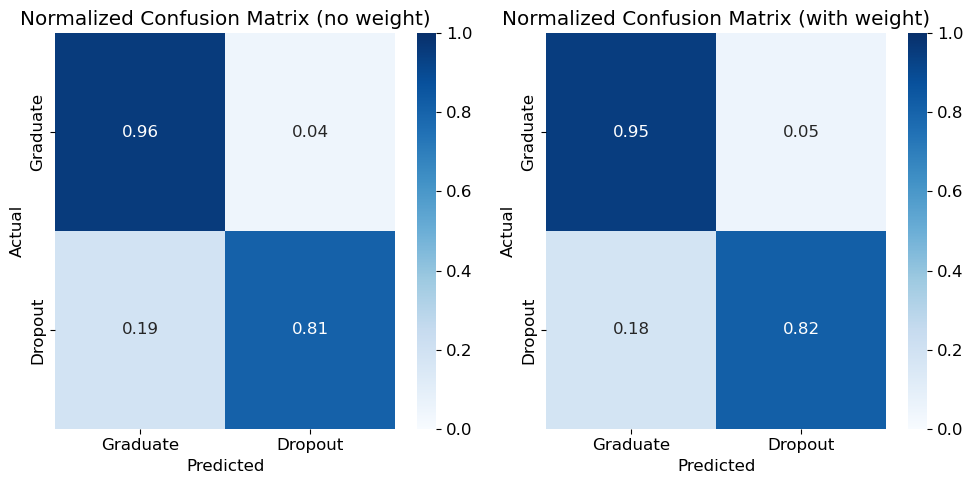

In [60]:
best_rf_pipeline2 = joblib.load('rf2_pipeline.joblib')
rf2_pipeline_weight = joblib.load('rf2_pipeline_weight.joblib')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

cmat_weigh = confusion_matrix(
    y_test_2,
    rf2_pipeline_weight.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

cmat = confusion_matrix(
    y_test_2,
    best_rf_pipeline2.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax1
)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Normalized Confusion Matrix (no weight)')
ax1.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax1.yaxis.set_ticklabels(['Graduate', 'Dropout'])

sns.heatmap(
    cmat_weigh,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax2
)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Normalized Confusion Matrix (with weight)')
ax2.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax2.yaxis.set_ticklabels(['Graduate', 'Dropout'])

plt.tight_layout()
plt.savefig("ConfusionMatrix_Random_Forest_Weighted2.png")
plt.show()


## Logistic Regression 2

In [61]:
from sklearn.linear_model import SGDClassifier


f1 = make_scorer(f1_score, average='macro')

params = {
    "sgdclassifier__penalty": ["l1", "l2"],
    "sgdclassifier__max_iter": [1000, 2000, 3000],
    "sgdclassifier__class_weight": ['balanced', None]
}

lr_w2_classifier_search = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('sgdclassifier', SGDClassifier(random_state=42,
                                                                early_stopping=True,
                                                                loss="log_loss"
                                                                ))
                               ])

grid = GridSearchCV(lr_w2_classifier_search, param_grid=params, scoring=f1)
grid.fit(X_train_2, y_train_2)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'lr_w2_classifier_search.joblib')

print("Accuracy: ", grid.score(X_test_2, y_test_2))
print(classification_report(y_test_2, grid.predict(X_test_2)))

Best params: {'sgdclassifier__class_weight': None, 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l1'}
Best score: 0.8673902707830331
Accuracy:  0.8706579145320801
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       449
           1       0.81      0.88      0.84       277

    accuracy                           0.88       726
   macro avg       0.87      0.88      0.87       726
weighted avg       0.88      0.88      0.88       726



For comparison lets also create a weighted model too.

In [62]:
lr_w2_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('sgdclassifier', SGDClassifier(random_state=42,
                                                                early_stopping=True,
                                                                loss="log_loss",
                                                                penalty='l1',
                                                                max_iter=1000,
                                                                class_weight='balanced'
                                                                ))
                               ])
lr_w2_pipeline.fit(X_train_2, y_train_2)

joblib.dump(lr_w2_pipeline, 'lr_w2_pipeline.joblib')

print("Accuracy: ", lr_w2_pipeline.score(X_test_2, y_test_2))
print(classification_report(y_test_2, lr_w2_pipeline.predict(X_test_2)))

Accuracy:  0.8760330578512396
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       449
           1       0.82      0.86      0.84       277

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



### Results

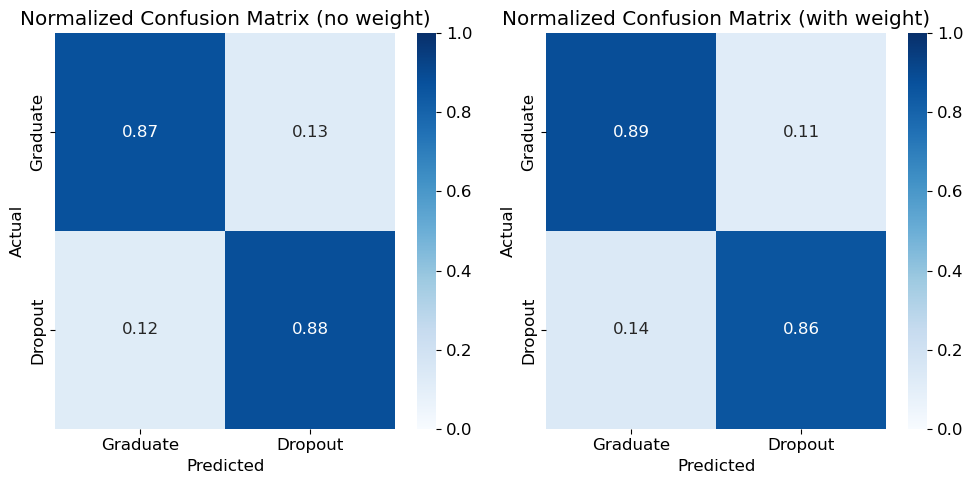

In [63]:
best_lr_w2_classifier_search = joblib.load('lr_w2_classifier_search.joblib')
lr_w2_pipeline = joblib.load('lr_w2_pipeline.joblib')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

cmat_weigh = confusion_matrix(
    y_test_2,
    lr_w2_pipeline.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

cmat = confusion_matrix(
    y_test_2,
    best_lr_w2_classifier_search.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax1
)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Normalized Confusion Matrix (no weight)')
ax1.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax1.yaxis.set_ticklabels(['Graduate', 'Dropout'])

sns.heatmap(
    cmat_weigh,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax2
)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Normalized Confusion Matrix (with weight)')
ax2.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax2.yaxis.set_ticklabels(['Graduate', 'Dropout'])

plt.tight_layout()
plt.savefig("ConfusionMatrix_LR2.png")
plt.show()


## XGBClassifier (weighted)

In [68]:

f1 = make_scorer(f1_score, average='macro')
params = {
    "xgb__scale_pos_weight": [4, 5, 6],
    'xgb__learning_rate': [0.1,0.2,0.3],
    'xgb__n_estimators': [25,50,100],
    'xgb__booster': ['gbtree', 'gblinear', 'dart', None]
}

xgb_classifier2_search = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, n_jobs=-1))
    
])

grid = GridSearchCV(xgb_classifier2_search, param_grid=params, scoring=f1)
grid.fit(X_train_2, y_train_2)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

joblib.dump(grid.best_estimator_, 'xgb_classifier2_search.joblib')


Best params: {'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.3, 'xgb__n_estimators': 50, 'xgb__scale_pos_weight': 4}
Best score: 0.8941740934578906


['xgb_classifier2_search.joblib']

In [74]:
xgb_classifier2_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, booster='gbtree', learning_rate=0.3, n_estimators=50, n_jobs=-1))
])

xgb_classifier2_pipeline.fit(X_train_2, y_train_2)

print("Accuracy: ", xgb_classifier2_pipeline.score(X_test_2, y_test_2))
print(classification_report(y_test_2, xgb_classifier2_pipeline.predict(X_test_2)))

joblib.dump(xgb_classifier2_pipeline, 'xgb_classifier2_pipeline.joblib')

Accuracy:  0.9008264462809917
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       449
           1       0.89      0.84      0.87       277

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



['xgb_classifier2_pipeline.joblib']

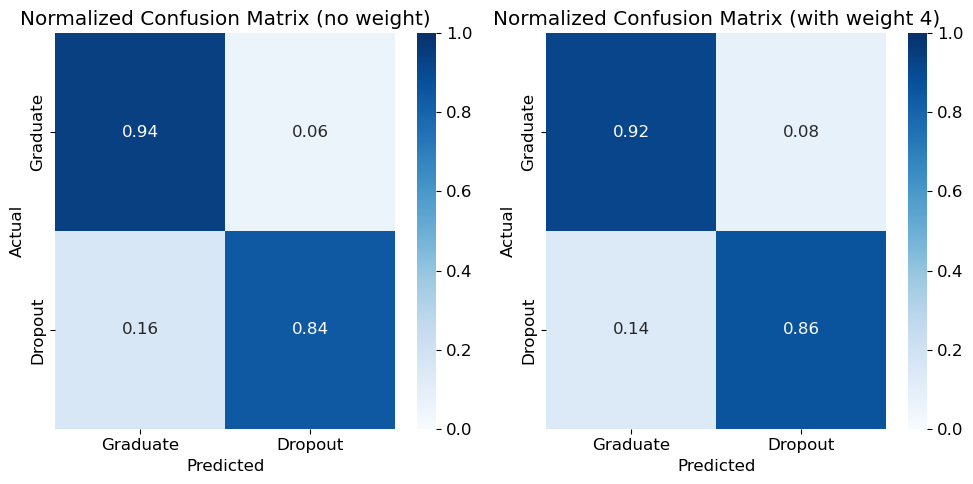

In [79]:
xgb_best_classifier2 = joblib.load('xgb_classifier2_search.joblib')
xgb_classifier2_pipeline = joblib.load('xgb_classifier2_pipeline.joblib')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

cmat_weigh = confusion_matrix(
    y_test_2,
    xgb_best_classifier2.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

cmat = confusion_matrix(
    y_test_2,
    xgb_classifier2_pipeline.predict(X_test_2),
    labels=([0, 1]),
    normalize='true'
)

sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax1
)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Normalized Confusion Matrix (no weight)')
ax1.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax1.yaxis.set_ticklabels(['Graduate', 'Dropout'])

sns.heatmap(
    cmat_weigh,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax2
)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Normalized Confusion Matrix (with weight 4)')
ax2.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax2.yaxis.set_ticklabels(['Graduate', 'Dropout'])

plt.tight_layout()
plt.savefig("ConfusionMatrix_LR2.png")
plt.show()


# CONCLUSION

## ROC curves of the best classifiers

In [ ]:
#show the curves

## Precision and Recall curves of the best models

In [ ]:
#show the curves